In [16]:
# Getting Python ready
from scipy.stats import norm
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np
#from ipynb.fs.full.Bernoulli import aBernoulliExperiment
import math
import textwrap
import ipynb.fs.defs.Bernoulli as bern


We will now create the procedure for an experiment whose outcomes are modeled by a Binomial RV. The function is

    aBinomialExperiment(randomNumGen, binomialParam_n=5, binomialParam_p=0.5)

As we would expect, the experiment involves binomialParam_n sub-experiments, where each sub-experiment's outcome is modeled by a Bernoulli(binomialParam_p) RV. The outcomes of the binomialParam_n Bernoulli RVs are independent.

The outcomes modeled by the Binomial RV are the number of trials that resulted in a 1.

In [17]:
def aBinomialExperiment(randomNumGen, binomialParam_n=5, binomialParam_p=0.5, numberOfBinomialExperiments = 1, profitLoss_Bern = [1,0]):
    
    outcomesOfBernTrails = bern.aBernoulliExperiment(randomNumGen, bernoulliParam_p=binomialParam_p, numRepeatsOfExp = numberOfBinomialExperiments, numTrialsInAnExp = binomialParam_n, profitLoss = profitLoss_Bern)

    #print(outcomesOfBernTrails, outcomesOfBernTrails.shape)

    outcomeOfBinomialExp = np.sum(outcomesOfBernTrails, axis = 1)#.reshape((numberOfBinomialExperiments,1)) #get a column vector

    #print(outcomeOfBinomialExp, outcomeOfBinomialExp.shape)

    return outcomeOfBinomialExp

The Quincunx machine (Galton Board) https://www.mathsisfun.com/data/quincunx.html

A ball hits a peg and falls to its left or to its right to reach a lower level row of pegs. It hits another peg in the lower level row and the process continues. Eventually the balls hits a peg in the last row and is collected in a bin either to the left or the right of the peg.

The animation shows how balls collect in the bins. The animation simulates a Binomial RV. How?


The Quincunx machine (Galton Board) https://www.mathsisfun.com/data/quincunx.html


A ball hitting a peg results in a Bernoulli(0.5) outcome (ball goes either left or right (loss/ win, failure/ success) with equal probability, where the Bernoulli RV maps left to 0 and maps right to 1). In the visualization, "Size" is the number of trials that constitute an experiment. Each bin corresponds to the number of pegs that deflected a ball to the right.

We perform one experiment whose outcome is governed by the Binomial distribution. The outcome is the number of trials that resulted in a 1.

The code cell below generates the outcome.

In [18]:
v_binomial_n = 5
v_binomial_p = 0.5
numberOfBinomialExps = 1

outcomeOfBinomialExp = aBinomialExperiment(np.random.default_rng(78918), v_binomial_n, v_binomial_p, numberOfBinomialExperiments = numberOfBinomialExps, profitLoss_Bern=[1,0])#, [-10,10])

print(outcomeOfBinomialExp)

[4.]


We will plot two histograms of outcomes. In one, we will plot the frequency of occurance of the outcomes against the values in the range space of the Binomial RV. Note that this is how we have shown PMFs of a Binomial RV and other discrete RVs. Also recall that frequencies of occurance are a frequentist's approximation of probabilities. A frequency of 0.35 is equivalent to a frequency of 35%.

We will also plot the frequency of occurance of the outcomes against the values in the range space of the Binomial RV normalized by the parameter n of the Binomial RV. To exemplify, suppose n = 5. The range space will contain {0,1,2,3,4,5}. The normalized values are {0,1/5, 2/5, 3/5, 4/5, 5/5} = {0, 0.2, 0.4, 0.6, 0.8, 1}. 

Suppose you perform 100 experiments with outcomes governed by such a Binomial RV. Further suppose that you observe the outcome 1 twenty times, the outcome 2 thirty times, the outcome 3 thirty times, the outcome 4 fifteen times, and the outcome 5 five times. The histogram will assign the frequencies 0, 0.2, 0.3, 0.3, 0.15, and 0.05, respectively to the outcomes 0, 1, 2, 3, 4, 5. 

In the first type of plot, we will see bars of height 0, 0.2, 0.3, 0.3, 0.15, and 0.05, plotted against the values 0, 1, 2, 3, 4, 5. In the second plot, we will see bars of height 0, 0.2, 0.3, 0.3, 0.15, and 0.05, plotted against the values 0, 0.2, 0.4, 0.6, 0.8, 1.

What does it mean for the value 2 to have occurred with frequency 0.2 or the value 3 having occurred with frequency 0.6? This is simple enough. All we are saying is that in 30% of the experiments, the experiment resulted in two 1(s) and three 0(s). Also, in 30% of the experiments, the experiment resulted in three 1(s) and two 0(s).

What does it mean for the value 0.2 to have occurred with frequency 30% or the value 0.3 having occurred with frequency 30%? Consider the statement that in 30% of the experiments, the experiment resulted in two 1(s) and three 0(s). An equivalent statement is that in every such experiment, any Bernoulli trial resulted in a 1 with frequency 20%. That is, in 30% of the experiments, the estimated probability of occurance of 1 in any such Bernoulli trial is 0.2.

The histogram values are: (array([0, 0, 0, 0, 1, 0]), array([0, 1, 2, 3, 4, 5, 6]))


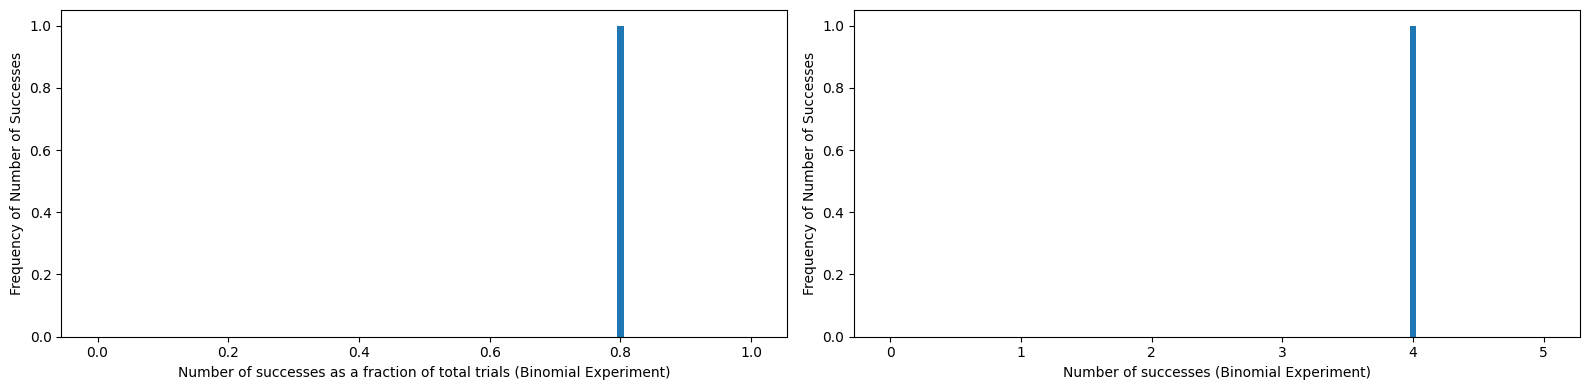

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(16,4))
#histVal = ax1.hist(outcomeOfBinomialExp + 1, bins=range(0,v_binomial_n+1), density=True, align='left')

histVal = np.histogram(outcomeOfBinomialExp, bins=range(0,v_binomial_n+2), density=False)#, rwidth=1)

print("The histogram values are:", histVal)

ax[0].bar(histVal[1][0:-1]/v_binomial_n, histVal[0]/numberOfBinomialExps, width = 0.01)
# ax1.set_xscale("linear")
ax[0].set_xlabel("Number of successes as a fraction of total trials (Binomial Experiment)")
ax[0].set_ylabel(textwrap.fill("Frequency of Number of Successes", 100))

ax[1].bar(histVal[1][0:-1], histVal[0]/numberOfBinomialExps, width = .05)
# ax1.set_xscale("linear")
ax[1].set_xlabel("Number of successes (Binomial Experiment)")
ax[1].set_ylabel(textwrap.fill("Frequency of Number of Successes", 100))

plt.tight_layout(h_pad = 5.0)

We perform many experiments and record the outcome for each experiment. Specifically, we record the number of trials that resulted in a 1 in the experiment. Note that each experiment's outcome is governed by the same Binomial RV. As we increase the number of experiments, the histogram of the outcomes of the experiments begins to look more and more like the PMF of the Binomial(n,p) RV.

In [20]:
numberOfBinomialExps = 10000

v_binomial_n = 20
v_binomial_p = 0.2

rng = np.random.default_rng(7381638)

outcomeOfBinomialExps = np.ndarray((numberOfBinomialExps,1))

outcomeOfBinomialExps = aBinomialExperiment(rng, v_binomial_n, v_binomial_p, numberOfBinomialExperiments=numberOfBinomialExps, profitLoss_Bern = [1,0])

# for i in range(numberOfBinomialExps):
#     outcomeOfBinomialExps[i,:] = aBinomialExperiment(rng, v_binomial_n, v_binomial_p, [1,0])

The histogram[1] values are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The histogram[0] values are: [ 112  587 1405 1992 2140 1741 1109  583  229   77   23    2    0    0
    0    0    0    0    0    0    0]
2


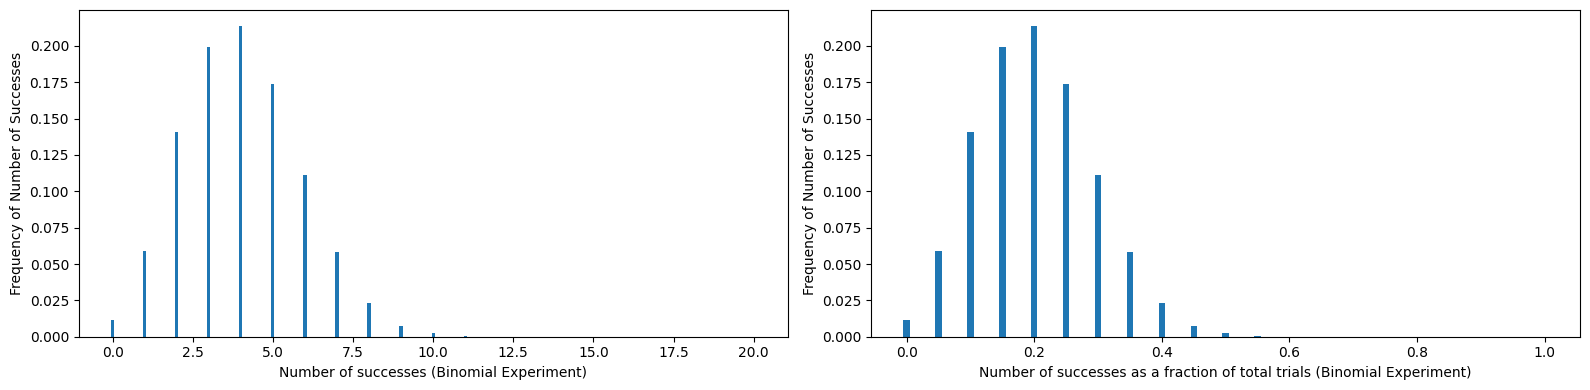

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(16,4))

#histVal = np.histogram(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True)

histVal = np.histogram(outcomeOfBinomialExps, bins=range(0,v_binomial_n+2), density=False)

#histVal = ax1.hist(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True, align='left')
# print("The histogram values are:", histhistVal[0].sizeVal[1])
# print("The histogram values are:", histVal[0])
# print(histVal[0].size)


#histVal[0].resize(histVal[1].shape)

# print(histVal[0])
# print(histVal[0][0:histVal[0].size])

#histVal[0][1:histVal[0].size] = histVal[0][0:histVal[0].size - 1]

print("The histogram[1] values are:", histVal[1])
print("The histogram[0] values are:", histVal[0])

print(ax.size)


# print(histVal[0])
# print(histVal[0].size)

ax[1].bar(histVal[1][0:-1]/v_binomial_n, histVal[0]/numberOfBinomialExps, width = 0.01)
# ax1.set_xscale("linear")
ax[1].set_xlabel("Number of successes as a fraction of total trials (Binomial Experiment)")
ax[1].set_ylabel(textwrap.fill("Frequency of Number of Successes", 100))

ax[0].bar(histVal[1][0:-1], histVal[0]/numberOfBinomialExps, width = 0.1)
# ax1.set_xscale("linear")
ax[0].set_xlabel("Number of successes (Binomial Experiment)")
ax[0].set_ylabel(textwrap.fill("Frequency of Number of Successes", 100))

plt.tight_layout(h_pad = 5.0)

Now consider the impact of increasing n. Note that we have set numberOfBinomialExperiments to a large number so that our histograms are reasonably good approximations of the corresponding PMFs.

As we increase n, we see two trends. (1) The histogram becomes more bell shaped. (2) The outcomes concentrate more and more around the mean in the histogram. The spread around the mean reduces as we increase n.

(1) is a consequence of the Central Limit Theorem. Specifically, the distribution of a sum of iid RVs looks more and more like the Gaussian distribution (bell shaped) as the number of RVs being summed increases. By iid we mean, independent and identically distribution. Independent as in the values taken by the RVs at the end of an experiment are independent of each other. Identical as in, the values taken by the RVs are governed by the same distribution (same family and setting of parameter values). So if X and Y both are Bernoulli(0.5), they are identical RVs. If $P[X=x, Y=y] = P[X=x] P[Y=y]$, for each $(x,y)$, then the RVs are also independent. In our experiments, where the outcome is governed by the Binomial distribution, the RVs being summed are Bernoulli.

(2) is a consequence of the Law of Large Numbers. Specifically the distribution of the average of a sum of iid RVs (average of $X_1, X_2, \ldots, X_n$ is $(X_1 + X_2 + ... + X_n)/n)$ becomes more and more concentrated and narrow around $E[X_i]$. Note that since the RVs are identically distributed, $E[X_i] = E[X_j]$ for all $i,j$.

We will look at both CLT and LLN when we go over sums of random variables.

In [22]:
frequentists = []

numberOfBinomialExps = 200000

v_binomial_n = [5, 10, 100, 1000]
v_binomial_p = 0.2

rng = np.random.default_rng(7381638)



for j in range(4):
    outcomeOfBinomialExps = np.ndarray((numberOfBinomialExps,1))

    outcomeOfBinomialExps = aBinomialExperiment(rng, v_binomial_n[j], v_binomial_p, numberOfBinomialExperiments=numberOfBinomialExps, profitLoss_Bern = [1,0])

    # for i in range(numberOfBinomialExps):
    #     outcomeOfBinomialExps[i,:] = aBinomialExperiment(rng, v_binomial_n[j], v_binomial_p, [1,0])

    # print("The outcomes are", outcomeOfBinomialExps)
    frequentists.append(outcomeOfBinomialExps)
    # print("The outcomes are", frequentists[j])


# for j in range(4):
#     print("The outcomes are", frequentists[j])

The sum is  1.0
The sum is  1.0
The sum is  1.0
The sum is  1.0


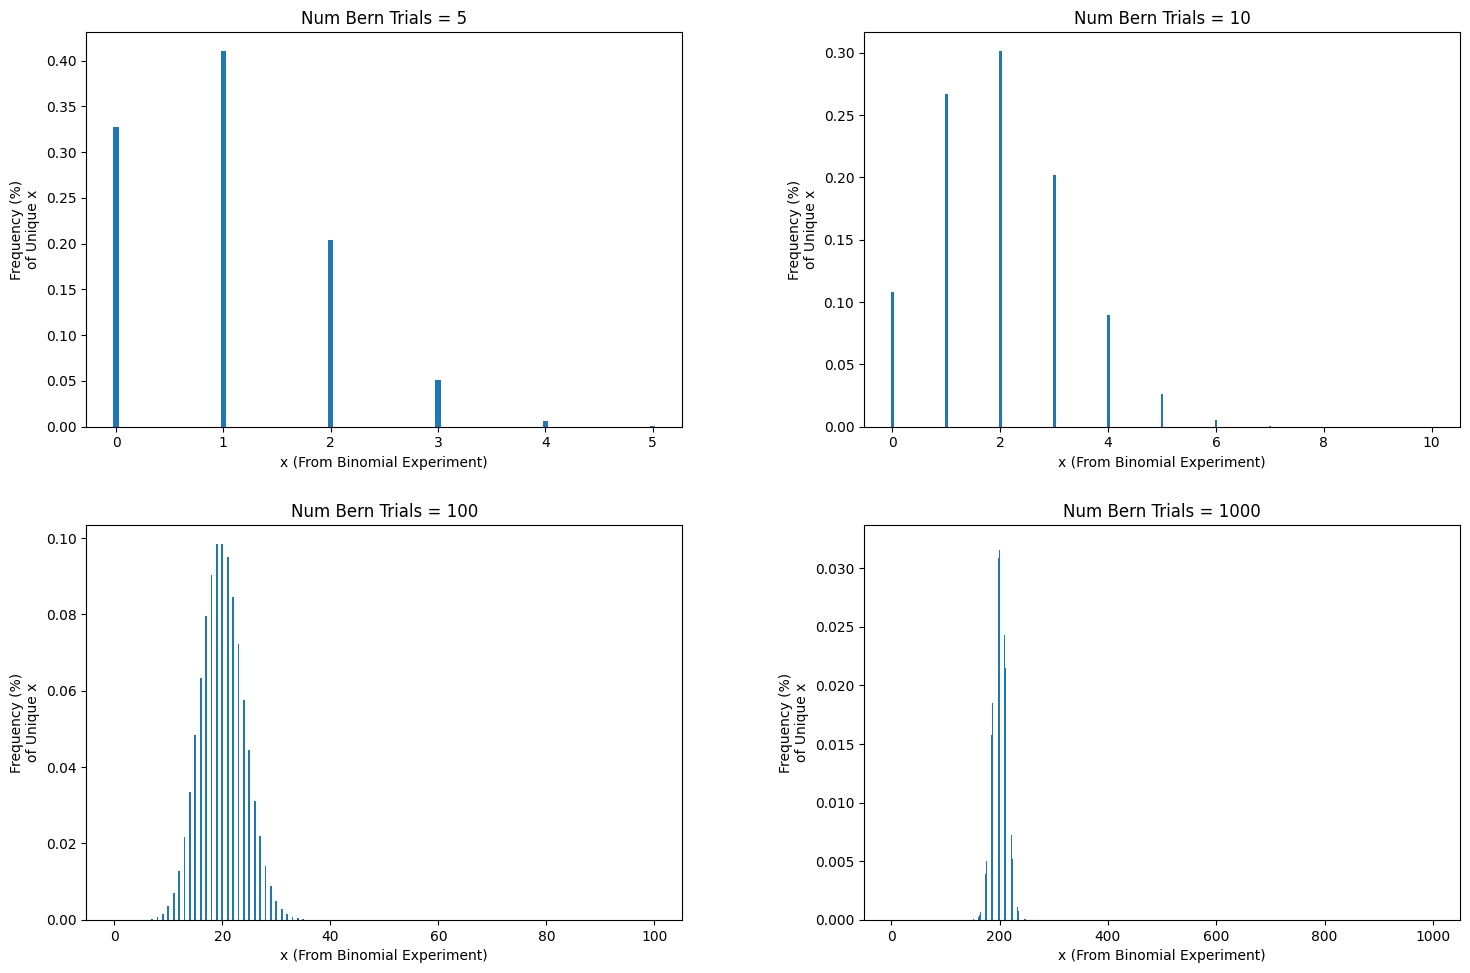

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(15,10))

#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=5.0)

# fig.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))
obsIdx = 0
widthArr = [0.05, 0.05, 0.35, 0.35]
#widthArr = [0.01, 0.01, 0.005, 0.0009]
#for rowidx in range(int(np.ceil(v_numRepeats/2))):
for rowidx in range(2):
    for colidx in range(2):
        # print("The outcomes are", frequentists[obsIdx], "obsIdx:", obsIdx)
        histVal = np.histogram(frequentists[obsIdx], bins=range(0,v_binomial_n[obsIdx]+2), density=False)
        # print("The histogram[1] values are:", histVal[1])
        # print("The histogram[0] values are:", histVal[0])

        ax[rowidx][colidx].bar(histVal[1][0:-1], histVal[0]/numberOfBinomialExps, width = widthArr[obsIdx])
        ax[rowidx][colidx].set_xscale("linear")
        ax[rowidx][colidx].set_xlabel("x (From Binomial Experiment)")
        ax[rowidx][colidx].set_ylabel(textwrap.fill("Frequency (%) of Unique x", width = 15))
        ax[rowidx][colidx].set_title("Num Bern Trials = " + str(v_binomial_n[obsIdx]))
        obsIdx = obsIdx + 1
        print("The sum is ", np.sum(histVal[0]/numberOfBinomialExps))

# plt.subplot_tool()
# plt.show(block=True)

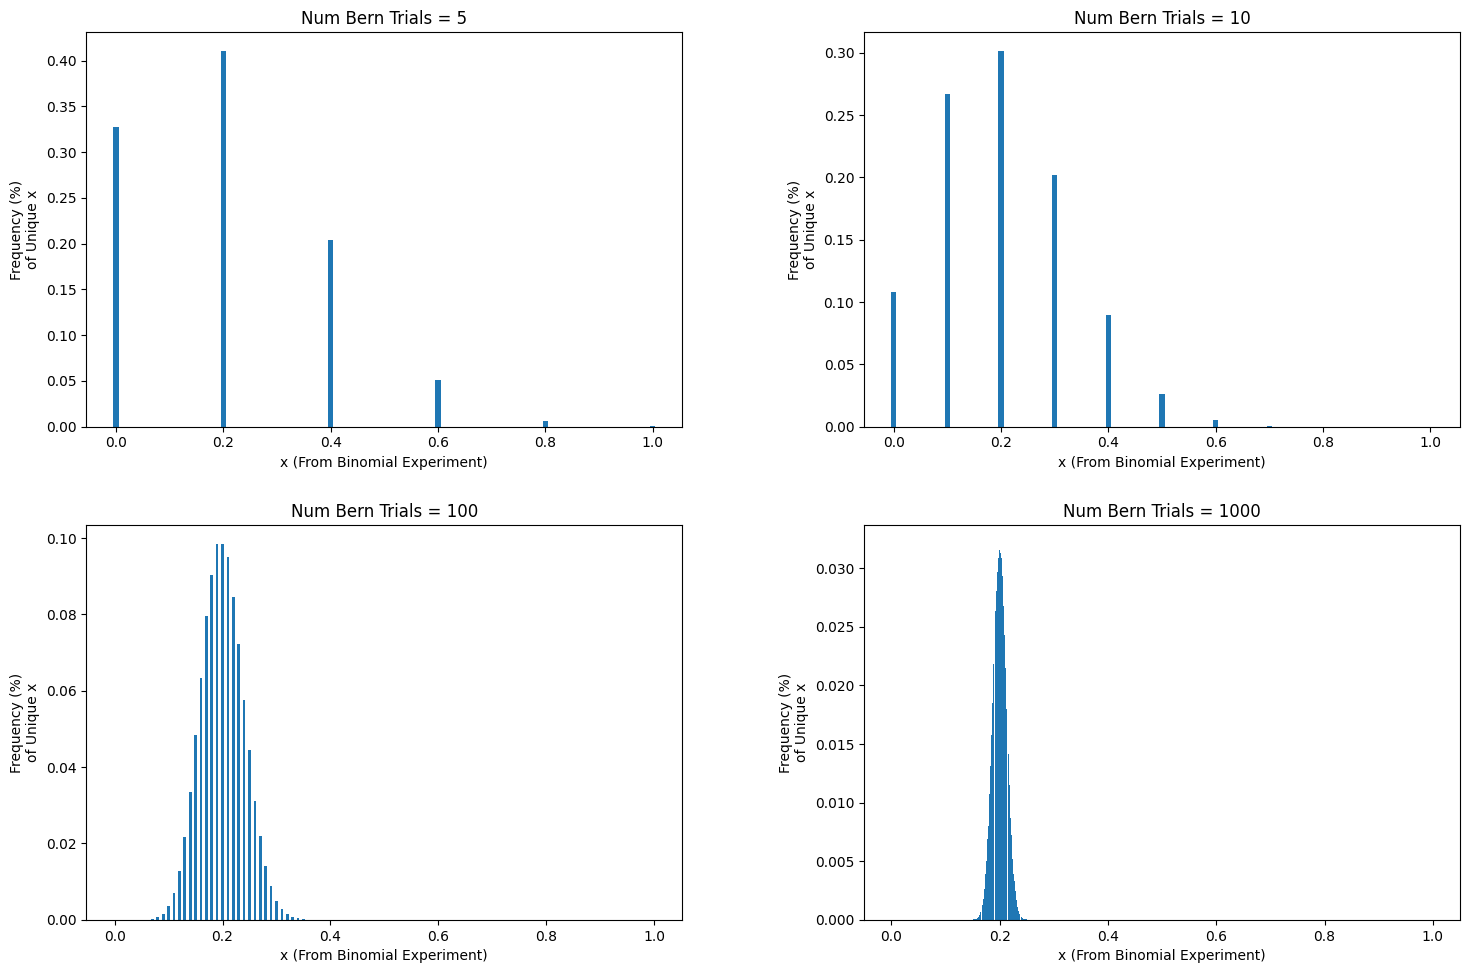

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(15,10))

#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=5.0)

# fig.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))
obsIdx = 0
widthArr = [0.01, 0.01, 0.005, 0.0009]
#for rowidx in range(int(np.ceil(v_numRepeats/2))):
for rowidx in range(2):
    for colidx in range(2):
        # print("The outcomes are", frequentists[obsIdx], "obsIdx:", obsIdx)
        histVal = np.histogram(frequentists[obsIdx], bins=range(0,v_binomial_n[obsIdx]+2), density=False)
        # print("The histogram[1] values are:", histVal[1])
        # print("The histogram[0] values are:", histVal[0])

        ax[rowidx][colidx].bar(histVal[1][0:-1]/v_binomial_n[obsIdx], histVal[0]/numberOfBinomialExps, width = widthArr[obsIdx])
        ax[rowidx][colidx].set_xscale("linear")
        ax[rowidx][colidx].set_xlabel("x (From Binomial Experiment)")
        ax[rowidx][colidx].set_ylabel(textwrap.fill("Frequency (%) of Unique x", width = 15))
        ax[rowidx][colidx].set_title("Num Bern Trials = " + str(v_binomial_n[obsIdx]))
        obsIdx = obsIdx + 1

# plt.subplot_tool()
# plt.show(block=True)


Suppose we map our Bernoulli outcomes to the set {-10,10}. Specifically, we map 0 to -10 and 1 to 10. You may think of each Bernoulli trial as a gamble in a casino that results in a profit of 10 Rupees with probability p and a loss of -10 Rupees otherwise. We will simulate the distribution of the total profit at the end of playing n gambles. The numberOfBinomialExps below may be though of as the number of gamblers.

We will also do the above for when each gamble results in a profit of 1 or a loss of -1.

In [25]:
numberOfBinomialExps = [1000, 1000] #To get histograms that are reasonable approximations of the PMFs

v_binomial_n = [50000, 500000]
v_binomial_p = 0.5
sizeofbet = [10, 1]

rng = np.random.default_rng(7381638)

print(numberOfBinomialExps[0])

outcomeOfBinomialExps_largeBet = np.ndarray((numberOfBinomialExps[0],1))

# for i in range(numberOfBinomialExps[0]):
#     outcomeOfBinomialExps_largeBet[i,:] = aBinomialExperiment(rng, v_binomial_n[0], v_binomial_p, [sizeofbet[0],-1 * sizeofbet[0]])


outcomeOfBinomialExps_largeBet = aBinomialExperiment(rng, v_binomial_n[0], v_binomial_p, numberOfBinomialExperiments=numberOfBinomialExps[0], profitLoss_Bern=[sizeofbet[0],-1 * sizeofbet[0]])

outcomeOfBinomialExps_smallBet = np.ndarray((numberOfBinomialExps[1],1))

# for i in range(numberOfBinomialExps[1]):
#     outcomeOfBinomialExps_smallBet[i,:] = aBinomialExperiment(rng, v_binomial_n[1], v_binomial_p, [sizeofbet[1],-1 * sizeofbet[1]])

outcomeOfBinomialExps_smallBet = aBinomialExperiment(rng, v_binomial_n[1], v_binomial_p, numberOfBinomialExperiments=numberOfBinomialExps[1], profitLoss_Bern=[sizeofbet[1],-1 * sizeofbet[1]])

#print(outcomeOfBinomialExps[:,:])
#print(outcomeOfBinomialExps[:,:]/v_binomial_n)

1000


LARGE BETS:
The histogram[1] values are: [-6200. -4982. -3764. -2546. -1328.  -110.  1108.  2326.  3544.  4762.
  5980.]
The histogram[0] values are: [  3  30  92 146 204 213 166  92  43  11]
E[X]**2 0.0
STDDEV 2236.06797749979
SMALL BETS:
The histogram[1] values are: [-2042.  -1552.6 -1063.2  -573.8   -84.4   405.    894.4  1383.8  1873.2
  2362.6  2852. ]
The histogram[0] values are: [ 12  55 145 264 249 160  95  16   2   2]
E[X]**2 0.0
STDDEV 707.1067811865476


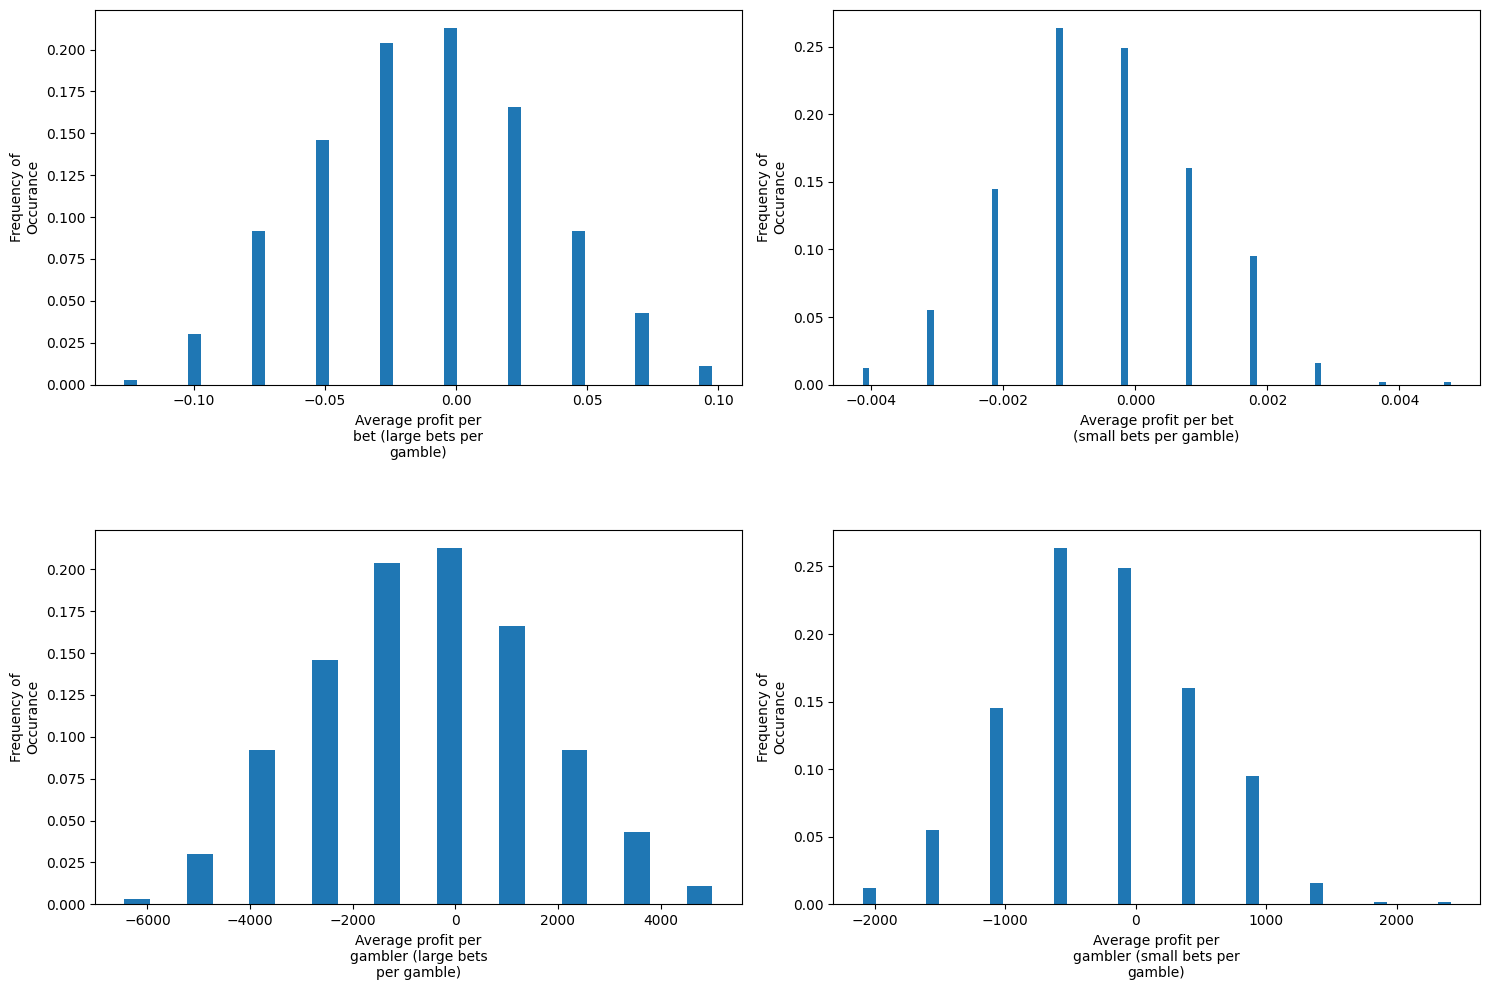

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(15,10))

#histVal = np.histogram(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True)

histVal = np.histogram(outcomeOfBinomialExps_largeBet, density=False)

#histVal = ax1.hist(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True, align='left')
# print("The histogram values are:", histhistVal[0].sizeVal[1])
# print("The histogram values are:", histVal[0])
# print(histVal[0].size)


#histVal[0].resize(histVal[1].shape)

# print(histVal[0])
# print(histVal[0][0:histVal[0].size])

#histVal[0][1:histVal[0].size] = histVal[0][0:histVal[0].size - 1]

print("LARGE BETS:")
print("The histogram[1] values are:", histVal[1])
print("The histogram[0] values are:", histVal[0])
print("E[X]**2", (v_binomial_p * sizeofbet[0] + (1 - v_binomial_p) * -sizeofbet[0])**2)
print("STDDEV", np.sqrt(v_binomial_n[0] * (v_binomial_p * sizeofbet[0]**2 + (1 - v_binomial_p) * (-sizeofbet[0])**2 - (v_binomial_p * sizeofbet[0] + (1 - v_binomial_p) * -sizeofbet[0])**2)))
#print("VARIANCE", v_binomial_n[0] * v_binomial_p * (1 - v_binomial_p))

# print(histVal[0])
# print(histVal[0].size)

ax[0][0].bar(histVal[1][0:-1]/v_binomial_n[0], histVal[0]/numberOfBinomialExps[0], width = .005)
ax[0][0].set_xlabel(textwrap.fill("Average profit per bet (large bets per gamble)",20))
ax[0][0].set_ylabel(textwrap.fill("Frequency of Occurance", 15))

ax[1][0].bar(histVal[1][0:-1], histVal[0]/numberOfBinomialExps[0], width = 500)
ax[1][0].set_xlabel(textwrap.fill("Average profit per gambler (large bets per gamble)",20))
ax[1][0].set_ylabel(textwrap.fill("Frequency of Occurance", 15))


histVal = np.histogram(outcomeOfBinomialExps_smallBet, density=False)
# histVal[0].resize(histVal[1].shape)
# histVal[0][1:histVal[0].size] = histVal[0][0:histVal[0].size - 1]

print("SMALL BETS:")
print("The histogram[1] values are:", histVal[1])
print("The histogram[0] values are:", histVal[0])
print("E[X]**2", (v_binomial_p * sizeofbet[1] + (1 - v_binomial_p) * -sizeofbet[1])**2)
print("STDDEV", np.sqrt(v_binomial_n[1] * (v_binomial_p * sizeofbet[1]**2 + (1 - v_binomial_p) * (-sizeofbet[1])**2 - (v_binomial_p * sizeofbet[1] + (1 - v_binomial_p) * -sizeofbet[1])**2)))

ax[0][1].bar(histVal[1][0:-1]/v_binomial_n[1], histVal[0]/numberOfBinomialExps[1], width = .0001)
ax[0][1].set_xlabel(textwrap.fill("Average profit per bet (small bets per gamble)",25))
ax[0][1].set_ylabel(textwrap.fill("Frequency of Occurance", 15))

ax[1][1].bar(histVal[1][0:-1], histVal[0]/numberOfBinomialExps[1], width = 100)
ax[1][1].set_xlabel(textwrap.fill("Average profit per gambler (small bets per gamble)",25))
ax[1][1].set_ylabel(textwrap.fill("Frequency of Occurance", 15))

plt.tight_layout(h_pad = 5.0)

Consider a country where any randomly chosen person is rich with probability p. The country has 30 states. The population of states is distributed as a Poisson RV with mean 1e5 (1 lakh)